# Result Overview

In this notebook, we create plots comparing the performance across the models.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import torch

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

import scp.plots as pl
from scp.utils import *
import os

np.random.seed(0)

In [2]:
all_models = ["baseline", "conjunction", "selection", "hybrid", "downshift local", "5-nn", "protDP"]
color_palette = sns.color_palette('tab10', len(all_models))
color_map = { model: color_palette[i] for i, model in enumerate(all_models) }

In [3]:
PATH = "../../../results/brunner2022/mai/"

In [8]:
file_names = os.listdir(PATH)

raw_results = [load_dict(f"{PATH}/{file}") for file in file_names]

In [9]:
def reshape_results(raw_results):
    model_names = np.unique([block["model"] for block in raw_results])

    result = {}

    for name in model_names:
        result[name] = {}

        elements = [block for block in raw_results if block["model"] == name]
        for key in elements[0].keys():
            if key == "model": 
                continue

            result[name][key] = [block[key] for block in elements]


    for name in model_names:
        idx = np.argsort(result[name]["mnar_proportion"])
        for key in result[name].keys():
            result[name][key] = np.array(result[name][key])[idx]

    return result

In [10]:
results = reshape_results(raw_results)

In [11]:
results

{'5-nn': {'mnar_proportion': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
  'mse_test': array([0.08127779, 0.09587276, 0.10414202, 0.11163888, 0.118573  ]),
  'mse_test_agg': array([1.68562186e-10, 5.60353514e-04, 1.36600773e-03, 2.63884884e-03,
         4.31585235e-03])},
 'baseline': {'mnar_proportion': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
  'mse_test': array([0.07620806, 0.09412962, 0.10267636, 0.10826226, 0.11663179]),
  'mse_test_agg': array([1.95167173e-05, 4.68265491e-04, 1.32451651e-03, 1.27227887e-03,
         3.57758423e-03])},
 'conjunction': {'mnar_proportion': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
  'mse_test': array([0.07755053, 0.09466087, 0.10164881, 0.1097783 , 0.11800759]),
  'mse_test_agg': array([4.05045513e-04, 4.98172971e-06, 1.92509965e-04, 1.06553496e-03,
         2.95218913e-03])},
 'hybrid': {'mnar_proportion': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
  'mse_test': array([0.11714302, 0.13432751, 0.14279802, 0.14675861, 0.15678977]),
  'mse_test_agg': array([9.93886

In [ ]:
del results["downshift local"]
del results["protDP"]

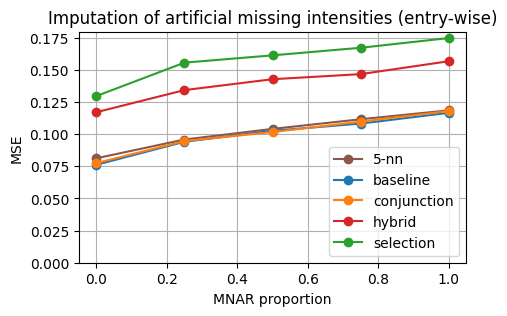

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

for model_name in results.keys():
    if "mse_test" not in results[model_name]:
        continue

    res = results[model_name]
    ax.plot(res["mnar_proportion"], res["mse_test"], label=model_name, marker="o", color=color_map[model_name])

ax.set_xlabel("MNAR proportion")
ax.set_ylabel("MSE")
ax.set_title("Imputation of artificial missing intensities (entry-wise)")
ax.set_ylim(bottom=0)
ax.legend(loc="lower right")
ax.grid(True)

# save as svg
fig.savefig("mai_brunner_entry.svg", bbox_inches="tight")

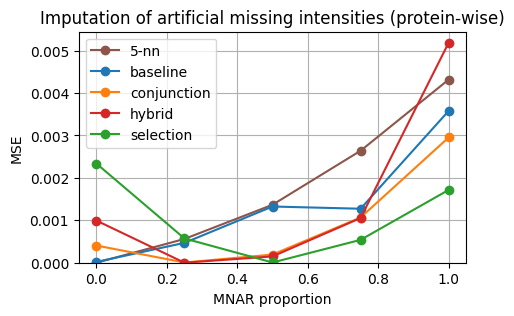

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

for model_name in results.keys():
    res = results[model_name]
    ax.plot(res["mnar_proportion"], res["mse_test_agg"], label=model_name, marker="o", color=color_map[model_name])

ax.set_xlabel("MNAR proportion")
ax.set_ylabel("MSE")
ax.set_title("Imputation of artificial missing intensities (protein-wise)")
ax.set_ylim(bottom=0)
ax.legend()
ax.grid(True)

# save as svg
fig.savefig("mai_brunner_aggr.svg", bbox_inches="tight")